# Wine Quality Prediction Analysis

Classification and regression of wine dataset

In [1]:
# Import Modules/Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
# Load the dataset/Reading Data
df=pd.read_csv('wine_dataset.csv')

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
# get total numbers of rows and columns
df.shape

(1599, 12)

There are a total of 1599 rows and 12 columns. The data looks very clean by looking at the first five rows, but I still wanted to make sure that there were no missing values.

In [5]:
# Missing Values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

As there no value is missing, I did not have to deal with any missing values, and there isn’t much flexibility to conduct some feature engineering given these variables. Next, I wanted to explore my data a little bit more.

In [6]:
# Get some statistics
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [7]:
# check datatype
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


The above data shows us that there are no NaN Values in this dataset

# Exploratry Data Analysis

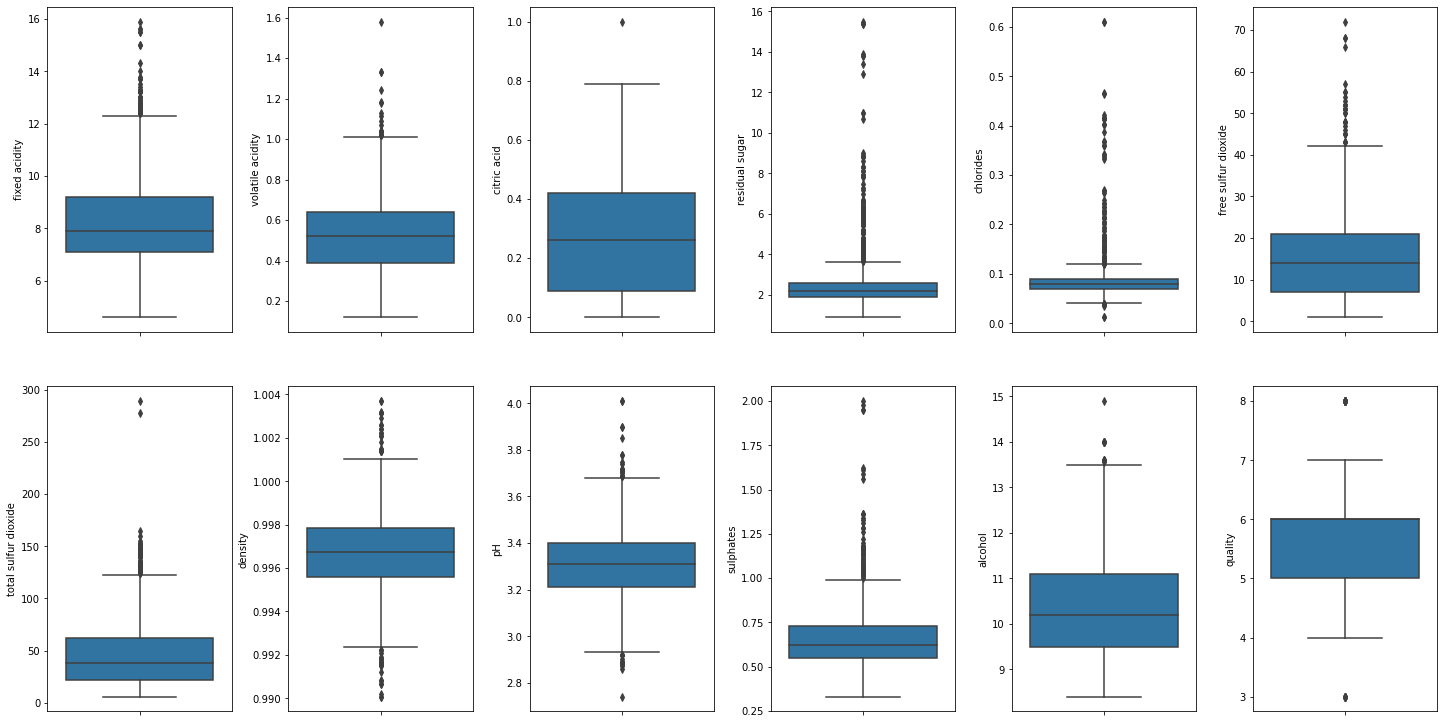

In [9]:
# Create Boxplots
fig, ax=plt.subplots(ncols=6,nrows=2, figsize=(20,10))
index=0
ax=ax.flatten()

for col, value in df.items():
    if col!='type':
        sns.boxplot(y=col, data=df, ax=ax[index])
        index+=1
        plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

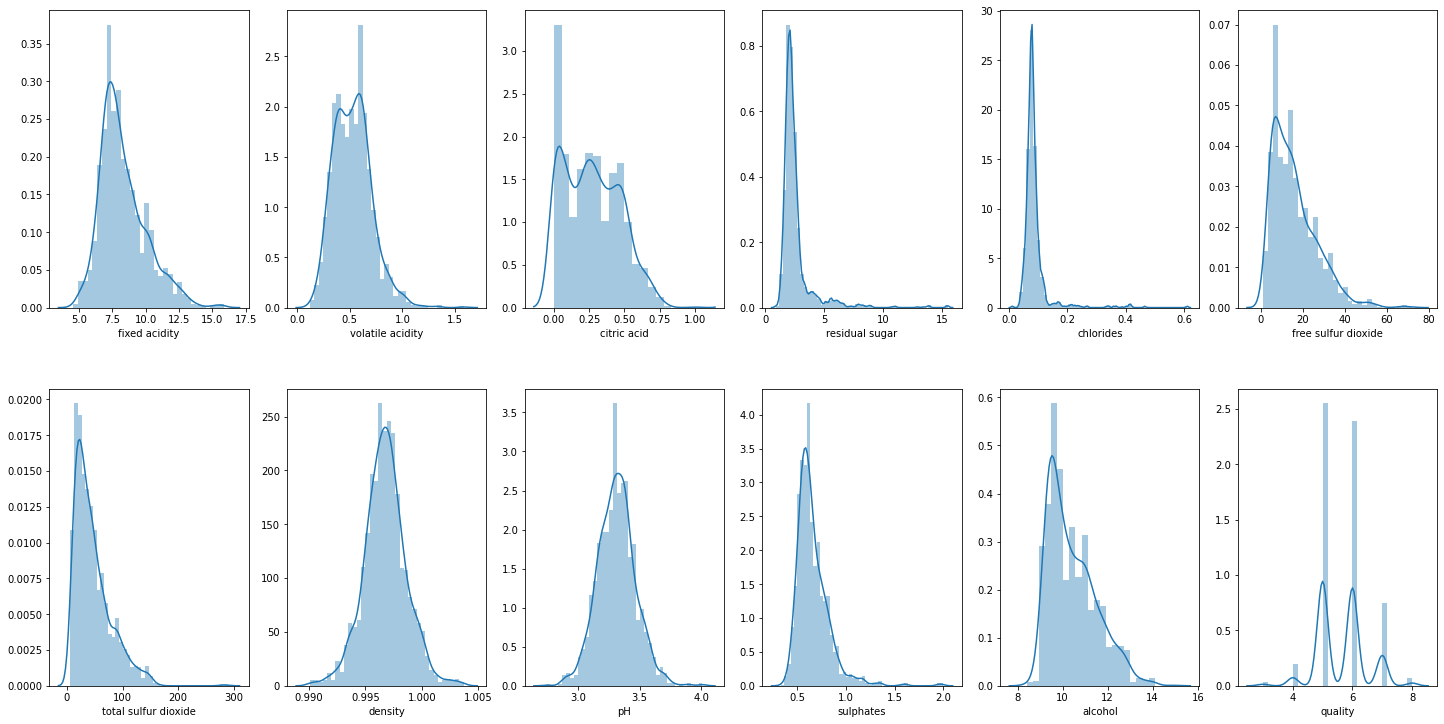

In [10]:
# Create distplot
fig, ax=plt.subplots(ncols=6,nrows=2, figsize=(20,10))
index=0
ax=ax.flatten()

for col, value in df.items():
    if col!='type':
        sns.distplot(value, ax=ax[index])
        index+=1
        plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

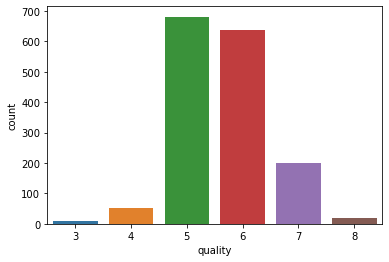

In [11]:
sns.countplot(df['quality'])

From above dashboard and graph, we had seen the distribution of the quality variable. We wanted to make sure that we had enough ‘good quality’ wines in our dataset — later, we will see how we defined ‘good quality’.

# Correlation Matrix

Next, Here we will see the correlations between the variables that we are working with. This allows us to get a much better understanding of the relationships between variables in a quick glimpse.
Immediately, We can see that there are some variables that are strongly correlated to quality. It’s likely that these variables are also the most important features in our machine learning model, but we’ll take a look at that later.

In [12]:
corr=df.corr()
corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


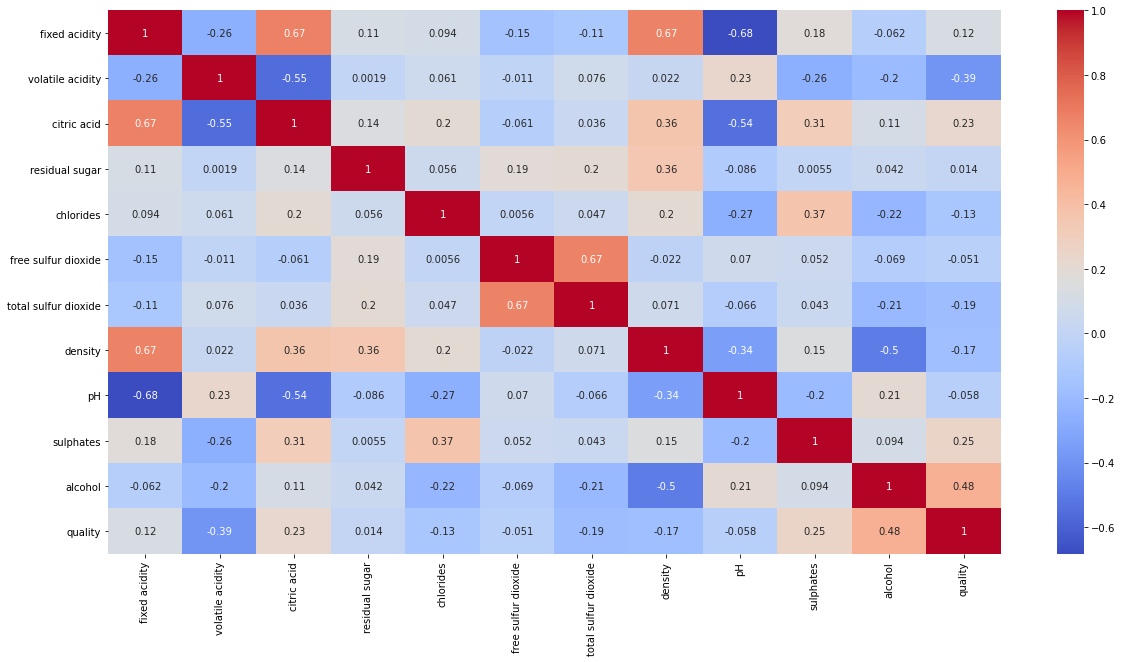

In [13]:
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True , cmap='coolwarm')

# Input Split

Going back to objective, Here we will compare the effectiveness of different classification techniques, so that we needed to change the output variable to a binary output.
For this problem, We will defined a bottle of wine as ‘good quality’ if it had a quality score of 7 or higher, and if it had a score of less than 7, it was deemed ‘bad quality’.
Once we convert the output variable to a binary output, we will separated the feature variables (X) and the target variable (y) into separate dataframes.

In [14]:
x=df.drop(columns=['quality'])
y=df['quality']

# Class imbalancement

In [15]:
y.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [16]:
#pip install imblearn

In [17]:
#from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SMOTE

oversample=SMOTE(k_neighbors=4)

# Transform the dataset
x,y=oversample.fit_resample(x,y)

In [18]:
y.value_counts()

7    681
5    681
3    681
8    681
6    681
4    681
Name: quality, dtype: int64

# Model Training

For this project, Now we will compare four different machine learning models: Logistic Regression, decision trees, random forests, and Extra Trees Classifier. For the purpose of this project, we wanted to compare these models by their accuracy.

In [19]:
# Classify function
from sklearn.model_selection import cross_val_score, train_test_split
def classify(model, x, y):
    x_train,x_test,y_train,y_test=train_test_split(x ,y, test_size=0.25, random_state=42)
    
    # Train the model
    model.fit(x_train, y_train)
    print("accuracy:", model.score(x_test,y_test)*100)
    
    # Cross-validation
    score= cross_val_score(model,x,y,cv=3)
    print('CV Score:', np.mean(score)*100)

In [20]:
#Logical Regression
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
classify(model,x,y)

accuracy: 46.96673189823875
CV Score: 47.283406754772386


In [21]:
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
classify(model, x, y)

accuracy: 79.9412915851272
CV Score: 72.80959373470387


In [22]:
#Random Forest Regressor Method
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
classify(model, x, y)

accuracy: 84.73581213307241
CV Score: 80.00489476260401


In [23]:
#Extra Trees Classifier
from sklearn.ensemble import ExtraTreesClassifier
model=ExtraTreesClassifier()
classify(model, x, y)

accuracy: 85.81213307240705
CV Score: 80.83700440528635


# CONCLUSION:
THE ABOVE OBSERVATIONS SHOW THAT THE MODEL HAS PREDICTED THE VALUES WITH AN ACCURACY OF 75-85%